# Pixel classification in multi-channel images


In [1]:
from skimage.data import cells3d
from skimage.io import imshow, imsave, imread
import napari
import numpy as np
import apoc

In [2]:
image = cells3d()

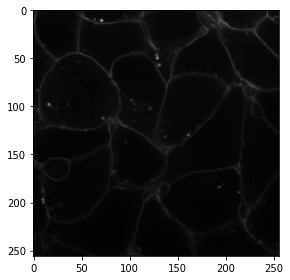

In [3]:
image_ch1 = image[30, 0]
imshow(image_ch1)

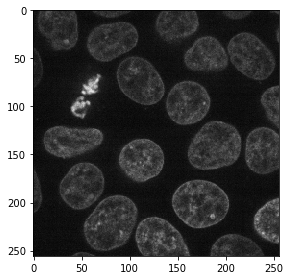

In [4]:
image_ch2 = image[30, 1]
imshow(image_ch2)

In [5]:
manual_annotation = False # change this if you want to annotate something yourself
if manual_annotation:
    viewer = napari.Viewer()
    
    viewer.add_image(image_ch1, blending='additive', colormap='green')
    viewer.add_image(image_ch2, blending='additive', colormap='magenta')
    
    annotation_layer = viewer.add_labels(np.zeros(image_ch1.shape).astype(int))

C:\Users\rober\Anaconda3\envs\bio_39\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


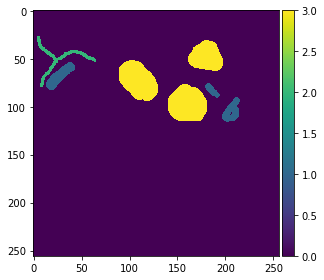

In [6]:
filename = 'cells_annotation.tif'
            
if manual_annotation:
    annotation = annotation_layer.data
    imsave(filename, annotation)
else:
    annotation = imread(filename)
imshow(annotation)

In [7]:
# define features: original image, a blurred version and an edge image
features = "original gaussian_blur=2 sobel_of_gaussian_blur=2"

# this is where the model will be saved
cl_filename = 'test.cl'

apoc.erase_classifier(cl_filename)
classifier = apoc.PixelClassifier(opencl_filename=cl_filename)
classifier.train(features=features, ground_truth=annotation, image=[image_ch1, image_ch2])


In [8]:
annotation.shape

(256, 256)

C:\Users\rober\Anaconda3\envs\bio_39\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
C:\Users\rober\AppData\Local\Temp\ipykernel_16816\2170673470.py:4: UserWarning: cells_result.tif is a low contrast image
  imsave('cells_result.tif', result)


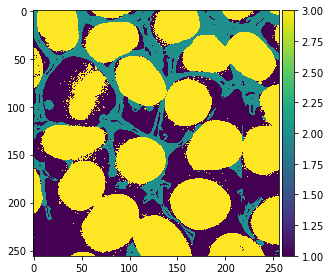

In [9]:
result = classifier.predict(image=[image_ch1, image_ch2])

imshow(result)
imsave('cells_result.tif', result)

## Reading the classifier file
You can also read the classifier OpenCL file as it is just a text file.

In [10]:
with open(cl_filename) as f:
    lines = f.readlines()

content = "\n".join(lines)
print(content.split("*/")[0])

/*

OpenCL RandomForestClassifier

classifier_class_name = PixelClassifier

feature_specification = original gaussian_blur=2 sobel_of_gaussian_blur=2

num_ground_truth_dimensions = 2

num_classes = 3

num_features = 6

max_depth = 2

num_trees = 10

apoc_version = 0.6.8




Using utility functions, you can also read out individual lines from the header. Note: These are [private functions]() which are subject to change. If your code breaks when using them, please come back to this notebook and see how it was updated.

In [11]:
apoc._utils._read_something_from_opencl_file(cl_filename, "num_ground_truth_dimensions = ")

'2'